# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot

### Importe o dataset

In [59]:
dados = pd.read_csv('dados_desafio.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [60]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [61]:
map = {'Y':'consumo',
       'X':'temperatura'}

dados.rename(map, axis=1, inplace=True)
dados.head()

,consumo,temperatura
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [62]:
dados.describe()

,consumo,temperatura
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

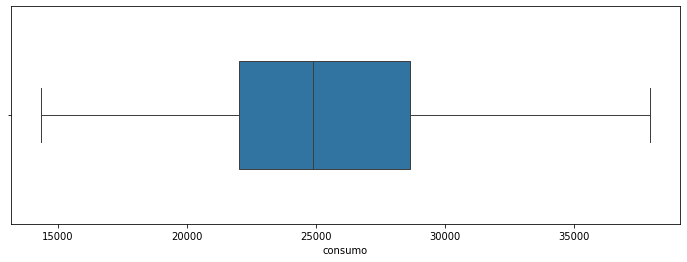

In [63]:
ax = sns.boxplot(dados.consumo, orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax = ax

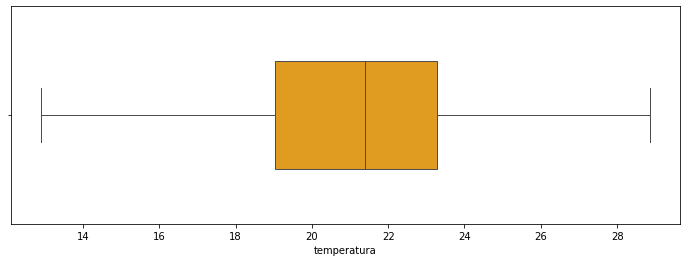

In [64]:
ax = sns.boxplot(dados.temperatura, orient='h', width=0.5, color='orange')
ax.figure.set_size_inches(12, 4)
ax = ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

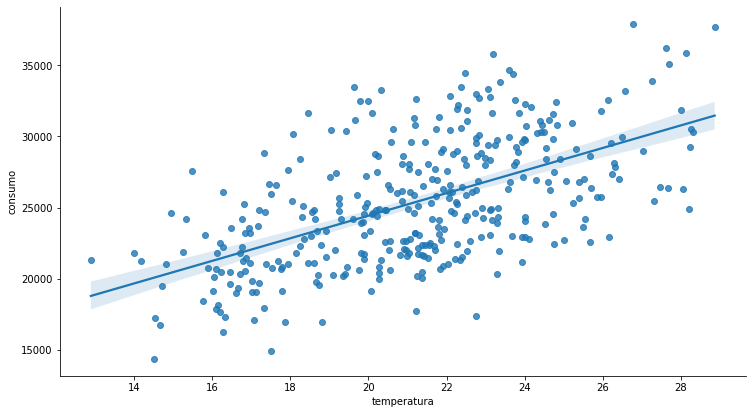

In [65]:
ax = sns.lmplot(data=dados, x='temperatura', y='consumo')
ax.figure.set_size_inches(12, 6)
ax = ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [66]:
dados.corr()

,consumo,temperatura
consumo,1.000000,0.574615
temperatura,0.574615,1.000000


In [67]:
dados[['temperatura', 'consumo']].corr()

,temperatura,consumo
temperatura,1.000000,0.574615
consumo,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Sim, através do coeficiente da correlação

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [68]:
Y = dados.consumo
X = sm.add_constant(dados.temperatura)

regressao = sm.OLS(Y, X).fit()

### Estime o modelo de regressão linear simples

In [80]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.87e-33
Time:                        14:50:49   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8528.9073   1275.363      6.687      

### Visualize o resultado da regressão

### Obtenha o $Y$ previsto

In [70]:
dados['consumo_pred'] = regressao.predict().round(1)
dados.head()

,consumo,temperatura,consumo_pred
0,25461,27.30,30229.2
1,28972,27.02,30006.6
2,30814,24.82,28257.9
3,29799,23.98,27590.2
4,28900,23.82,27463.0


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [84]:
regressao.predict([1, 42])[0].round(2)

41913.97

In [71]:
regressao.params

const          8528.907284
temperatura     794.882537
dtype: float64

In [72]:
def predict(x):
    return 8528.91 + 794.88*x

print("%.2f"%predict(42))

41913.87


### Obtenha os resíduos da regressão

In [73]:
dados['u'] = dados.consumo - dados.consumo_pred
dados.head()

,consumo,temperatura,consumo_pred,u
0,25461,27.30,30229.2,-4768.2
1,28972,27.02,30006.6,-1034.6
2,30814,24.82,28257.9,2556.1
3,29799,23.98,27590.2,2208.8
4,28900,23.82,27463.0,1437.0


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

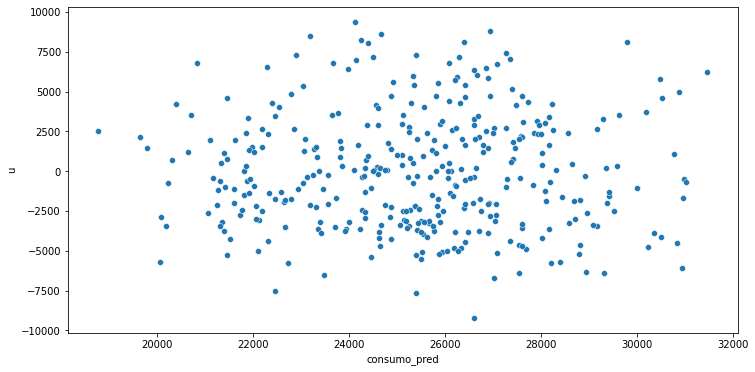

In [74]:
ax = sns.scatterplot(x=dados.consumo_pred, y=dados.u)
ax.figure.set_size_inches(12, 6)
ax = ax

### Obtenha o QQPlot dos resíduos

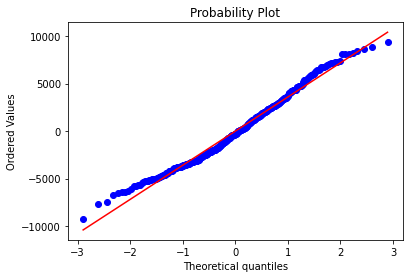

In [89]:
(_, (_, _, _)) = probplot(dados.u, plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [75]:
SQR = regressao.ess

In [76]:
SQT = dados.consumo.apply(lambda y: (y - dados.consumo.mean())**2).sum()

In [77]:
Rsquared = SQR / SQT
Rsquared

0.33018204933243206

In [78]:
regressao.rsquared

0.330182049332432